In [ ]:
!pip3 install matplotlib

In [1]:
from matplotlib import pyplot as plt
import random
import numpy as np

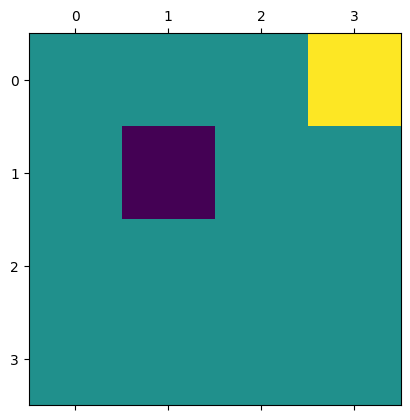

In [48]:

env = [
    [0, 0, 0, 100],
    [0, -100, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0]
]
plt.matshow(env)

q_matrix = [
    [[0,0,0,0], [0,0,0,0], [0,0,0,0], [0,0,0,0]],
    [[0,0,0,0], [0,0,0,0], [0,0,0,0], [0,0,0,0]],
    [[0,0,0,0], [0,0,0,0], [0,0,0,0], [0,0,0,0]],
    [[0,0,0,0], [0,0,0,0], [0,0,0,0], [0,0,0,0]]
]

win_state = [0,3]
loss_state = [1,1]




In [44]:


def get_possible_actions(current_pos):
    # N(0), S(1), E(2), W(3) 
    actions =[]
    if current_pos[0] > 0:
        actions.append(0)
    if current_pos[0] < len(env)-1:
        actions.append(1)
    if current_pos[1] < len(env[0])-1:
        actions.append(2)
    if current_pos[1] > 0:
        actions.append(3)
    return actions

def game_complete(current_pos):
    return current_pos == win_state or current_pos == loss_state 

def goal_reached(current_pos):
    return current_pos == win_state

def get_next_state(current_pos, action):
    if(action == 0):
        return [current_pos[0] - 1,current_pos[1]] 
    elif (action == 1):
        return [current_pos[0] + 1,current_pos[1]] 
    elif (action == 2):
        return [current_pos[0],current_pos[1]+1]
    else:
        return [current_pos[0],current_pos[1]-1] 


[[80.99745297 89.99893521 99.99978813  0.        ]
 [72.89163138  0.         89.99995439 99.99999879]
 [65.60995809 72.89997496 80.99999194 89.9999971 ]
 [59.04895629 65.60996997 72.89998784 80.99999526]]
[[2 2 2 0]
 [0 0 2 0]
 [2 2 2 0]
 [2 2 2 0]]


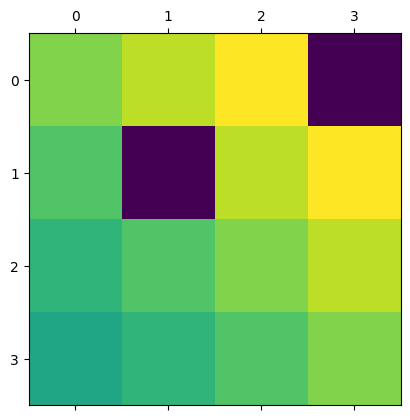

In [47]:
discount = 0.9
learning_rate = 0.1

for _ in range(10):
    current_pos = [random.randint(0, len(env)-1), random.randint(0, len(env)-1)]
    while(not game_complete(current_pos)):
        possible_actions = get_possible_actions(current_pos)
        action = random.choice(possible_actions)
        next_state = get_next_state(current_pos, action)
        q_matrix[current_pos[0]][current_pos[1]][action] = q_matrix[current_pos[0]][current_pos[1]][action] + learning_rate * (env[next_state[0]][next_state[1]] + discount *  max(q_matrix[next_state[0]][next_state[1]]) - q_matrix[current_pos[0]][current_pos[1]][action])
        current_pos = next_state
      

# print(np.round(q_matrix))
# print("=============")

values = []
directions = []

for row in q_matrix:
    for column in row:
        # max(column)
        # print(np.argmax(column), column[np.argmax(column)])
        values.append(column[np.argmax(column)])
        directions.append(np.argmax(column))


values = np.reshape(values,(4,4))
directions = np.reshape(directions,(4,4))

print(values)
print(directions)


plt.matshow(values)


